In [5]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [17]:
X,y=make_circles(n_samples=500,noise=.02)
X1=X[:,0]
X2=X[:,1]

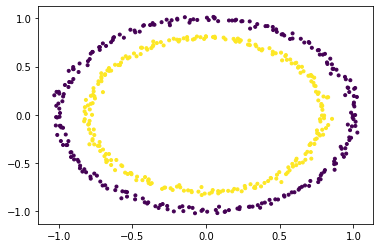

In [19]:
plt.scatter(X1,X2,c=y,marker='.')
plt.show()

In [20]:
#kernal trick
X3=X1**2+X2**2

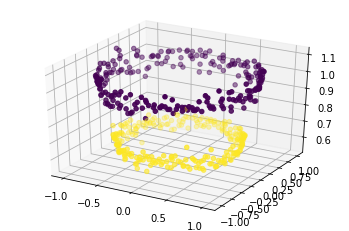

In [24]:
from mpl_toolkits.mplot3d import Axes3D
axes=plt.subplot(projection='3d')
axes.scatter(X1,X2,X3,c=y)
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [29]:
linear_svc=SVC(kernel='linear')
cross_val_score(linear_svc,X,y,cv=10).mean()

0.406

In [35]:
import pandas as pd

In [36]:
df=pd.DataFrame()
df['x1']=X1
df['x2']=X2
df['x3']=X3

In [38]:
X_new=df.values

In [40]:
linear_svc=SVC(kernel='linear')
cross_val_score(linear_svc,X_new,y,cv=10).mean()

1.0

In [42]:
linear_svc=SVC(kernel='linear')
cross_val_score(linear_svc,X,y,cv=10).mean()

0.406

In [78]:
g=1
rbf_svc=SVC(kernel='rbf',gamma=g)
cross_val_score(rbf_svc,X,y,cv=10).mean()

1.0

In [113]:
dg=2
poly_svc=SVC(kernel='poly',gamma=g,degree=dg,coef0=0)
cross_val_score(poly_svc,X,y,cv=10).mean()

1.0

In [114]:
sigmoid_svc=SVC(kernel='sigmoid',gamma=g)
cross_val_score(sigmoid_svc,X,y,cv=10).mean()

0.508

In [115]:
rbf_svc.fit(X,y)
poly_svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0,
    decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
test_sample=X[100]
test_sample

array([-0.51299546,  0.88301586])

In [124]:
print(rbf_svc.decision_function([test_sample]))
print(rbf_svc.predict([test_sample]))

[-1.26735607]
[0]


RBF Decision Function Manually:
    --

In [125]:
k=np.exp(-g*np.sum(np.square(rbf_svc.support_vectors_-test_sample),axis=1))
d=np.sum(rbf_svc.dual_coef_*k)+rbf_svc.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)

[-1.26735607]
0


In [126]:
print(poly_svc.decision_function([test_sample]))
print(poly_svc.predict([test_sample]))

[-1.47342792]
[0]


Polynimial Decision Function Manually:
    --

In [127]:
k=(g*(poly_svc.support_vectors_@test_sample)+poly_svc.coef0)**dg
d=np.sum(poly_svc.dual_coef_*k)+poly_svc.intercept_
print(d)
if(d<0):
    print(0)
else:
    print(1)

[-1.47342792]
0
